# Parametrization

In [26]:
# parametrization basic example

import nevergrad as ng

# Create optimization problem object
param = ng.p.Dict(
   char=ng.p.Choice(["a", "b", "c"]),
   log=ng.p.Log(lower=0.01, upper=1.0),
   array=ng.p.Array(shape=(2,)),
)


# Objective function
def objective_function(param_dict):
   char_value = param_dict['char']
   log_value = param_dict['log']
   array_value = param_dict['array']
  
   # In practical applications, you can define the objective function according to actual needs
   return log_value * sum(array_value)


# Create CMA-ES optimizer object and run optimization
optimizer = ng.optimizers.CMA(parametrization=param, budget=100)
recommendation = optimizer.minimize(objective_function)


# Get the best parameters and the best value
best_params = recommendation.value
best_value = objective_function(best_params)


print(f"Best parameters: {list(best_params.values())}")
print(f"Best value: {best_value}")


Best parameters: ['c', 0.9015044707754554, array([-10.6399132 ,  -5.00877046])]
Best value: -14.107358280134797


In [30]:
# initialization block
import numpy as np
# create a new instance
child = param.spawn_child()
# update its value
child.value = {"char": "c", "log": 0.2, "array": np.array([12.0, 13.0])}

# export to standardized space
data = child.get_standardized_data(reference=param)
print(data)

# Create instrumentation with initial values
instru = param.spawn_child().set_standardized_data(data)



[12.         13.          0.          0.          0.69314718  0.90308999]


In [35]:
# parametrization initialization example with initial values

import nevergrad as ng

# Create optimization problem object
param = ng.p.Dict(
   char=ng.p.Choice(["a", "b", "c"]),
   log=ng.p.Log(lower=0.01, upper=1.0),
   array=ng.p.Array(shape=(2,)),
)

# Create CMA-ES optimizer object
optimizer = ng.optimizers.CMA(parametrization=param, budget=100)

# Manually set initial value
initial_value = {"char": "c", "log": 0.2, "array": [12.0, 13.0]}
child = param.spawn_child()
child.value = initial_value

# Objective function
def objective_function(param_dict):
   char_value = param_dict['char']
   log_value = param_dict['log']
   array_value = param_dict['array']
  
   # In practical applications, you can define the objective function according to actual needs
   return log_value * sum(array_value)

# Run optimization
recommendation = optimizer.minimize(objective_function)


# Get the best parameters and the best value
best_params = recommendation.value
best_value = objective_function(best_params)


print(f"Best parameters: {list(best_params.values())}")
print(f"Best value: {best_value}")

Best parameters: ['b', 0.8567687295783879, array([-14.53765117,  -8.66416756])]
Best value: -19.878592763087696


In [37]:
# record trajectory to check the initial point
import nevergrad as ng
import numpy as np

# Create optimization problem object
param = ng.p.Dict(
   char=ng.p.Choice(["a", "b", "c"]),
   log=ng.p.Log(lower=0.01, upper=1.0),
   array=ng.p.Array(shape=(2,)),
)

# Create CMA-ES optimizer object
optimizer = ng.optimizers.CMA(parametrization=param, budget=100)

# Manually set initial value
initial_value = {"char": "c", "log": 0.2, "array": [12.0, 13.0]}
child = param.spawn_child()
child.value = initial_value

# 记录优化轨迹
optimization_trajectory = [child.get_standardized_data(reference=param)]

# Objective function
def objective_function(param_dict):
   char_value = param_dict['char']
   log_value = param_dict['log']
   array_value = param_dict['array']
  
   # In practical applications, you can define the objective function according to actual needs
   return log_value * sum(array_value)

# Run optimization
for _ in range(optimizer.budget):
    optimizer.tell(child, objective_function(child.value))
    recommendation = optimizer.ask()

    # 记录优化轨迹
    optimization_trajectory.append(recommendation)

# 获取最优参数和最优值
best_params = recommendation.value
best_value = objective_function(best_params)

print(f"Best parameters: {list(best_params.values())}")
print(f"Best value: {best_value}")

# 打印优化轨迹
for i, trajectory_point in enumerate(optimization_trajectory):
    print(f"Iteration {i}: {trajectory_point}")


Best parameters: ['b', 0.11739904047992411, array([1.05326005, 0.61705155])]
Best value: 0.19609297907652037
Iteration 0: [12.         13.          0.          0.          0.69314718  0.90308999]
Iteration 1: Dict(array=Array{(2,)},char=Choice(choices=Tuple(a,b,c),indices=Array{(1,3),SoftmaxSampling}),log=Log{Cl(-5.999999999999999,0,b),exp=2.15}):{'char': 'c', 'log': 0.145597524634015, 'array': array([0.0301569 , 1.06933797])}
Iteration 2: Dict(array=Array{(2,)},char=Choice(choices=Tuple(a,b,c),indices=Array{(1,3),SoftmaxSampling}),log=Log{Cl(-5.999999999999999,0,b),exp=2.15}):{'char': 'b', 'log': 0.06748863753661731, 'array': array([-0.12607946, -0.56127711])}
Iteration 3: Dict(array=Array{(2,)},char=Choice(choices=Tuple(a,b,c),indices=Array{(1,3),SoftmaxSampling}),log=Log{Cl(-5.999999999999999,0,b),exp=2.15}):{'char': 'c', 'log': 0.2845944588908581, 'array': array([-0.54703903, -1.31358173])}
Iteration 4: Dict(array=Array{(2,)},char=Choice(choices=Tuple(a,b,c),indices=Array{(1,3),Sof

# Budget

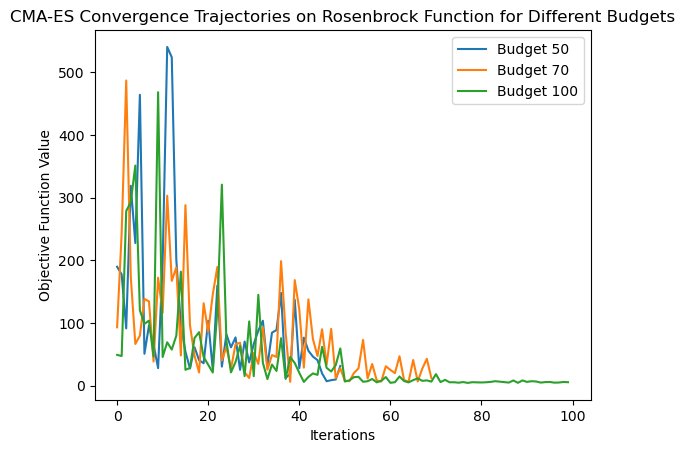

In [49]:
import nevergrad as ng
import matplotlib.pyplot as plt

# Objective function (example: Rosenbrock function)
def objective_function(x):
    return sum(100.0 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

# Record the trajectories
trajectories = []

# For each budget, create a separate list
for budget in [50, 70, 100]:
    optimizer = ng.optimizers.CMA(parametrization=5, budget=budget, num_workers=1)
    
    # List to store the trajectory for the current budget
    budget_trajectory = []
    
    for ite in range(optimizer.budget):
        recommendation = optimizer.ask()
        value = objective_function(recommendation.value)
        optimizer.tell(recommendation, value)
        budget_trajectory.append(value)
    
    # Append the budget_trajectory to the trajectories list
    trajectories.append((budget, budget_trajectory))

# Plot convergence trajectories for different budgets
for budget, trajectory in trajectories:
    plt.plot(trajectory, label=f'Budget {budget}')

plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.legend()
plt.title('CMA-ES Convergence Trajectories on Rosenbrock Function for Different Budgets')
plt.show()


TypeError: 'method' object is not iterable

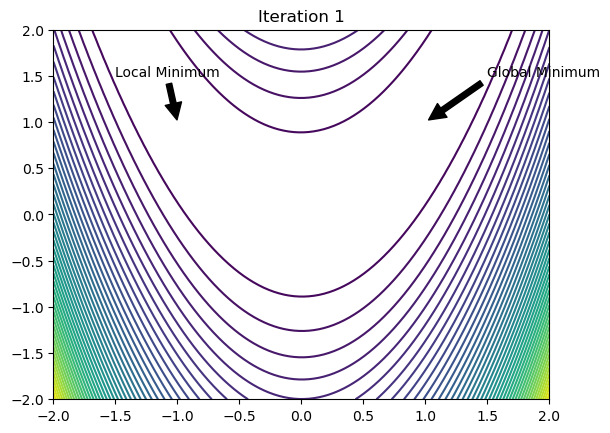

In [63]:
import nevergrad as ng
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Objective function (example: Rosenbrock function)
def objective_function(x):
    return sum(100.0 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

# CMA-ES optimization
def run_cma(budget):
    optimizer = ng.optimizers.CMA(parametrization=5, budget=budget)
    recommendation = optimizer.minimize(objective_function)
    return optimizer, recommendation.value

# Create a figure and axis
fig, ax = plt.subplots()

# Set up the contour plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = objective_function(np.vstack([X.ravel(), Y.ravel()]))

contour = ax.contour(X, Y, Z.reshape(X.shape), levels=50, cmap="viridis")

# Scatter plot for the trajectory
sc = ax.scatter([], [], c="red", label="Trajectory")

# Annotation for global and local minima
ax.annotate("Global Minimum", xy=(1, 1), xytext=(1.5, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.annotate("Local Minimum", xy=(-1, 1), xytext=(-1.5, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

# Initialize empty trajectory
trajectory = []

# Update function for animation
def update(frame):
    ax.set_title(f"Iteration {frame+1}")
    optimizer, _ = run_cma(500)
    traj = np.array(list(optimizer.archive.values))[:, :2]  # Extract only the first two parameters for simplicity
    trajectory.append(traj)
    sc.set_offsets(traj)
    return sc,

# Create animation
animation = FuncAnimation(fig, update, frames=50, interval=500, blit=True)

# Show the plot
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
plt.legend()
plt.show()


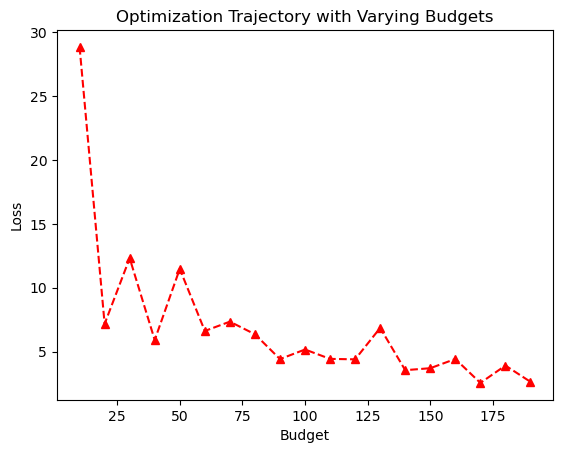

In [82]:
import nevergrad as ng
import matplotlib.pyplot as plt

# Objective function (example: Rosenbrock function)
def objective_function(x):
    return sum(100.0 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

# 不同 budget 下的运行
budgets = [10*i for i in range(1, 20)]
trajectory = []

for budget in budgets:
    optimizer = ng.optimizers.CMA(parametrization=5, budget=budget)
    recommendation = optimizer.minimize(objective_function)
    best_params = recommendation.value
    best_value = objective_function(best_params)
    trajectory.append((budget, best_value))

# 绘制轨迹
x_values, y_values = zip(*trajectory)
plt.plot(x_values, y_values, marker='^', linestyle='--', color='red')
plt.xlabel('Budget')
plt.ylabel('Loss')
plt.title('Optimization Trajectory with Varying Budgets')
plt.show()


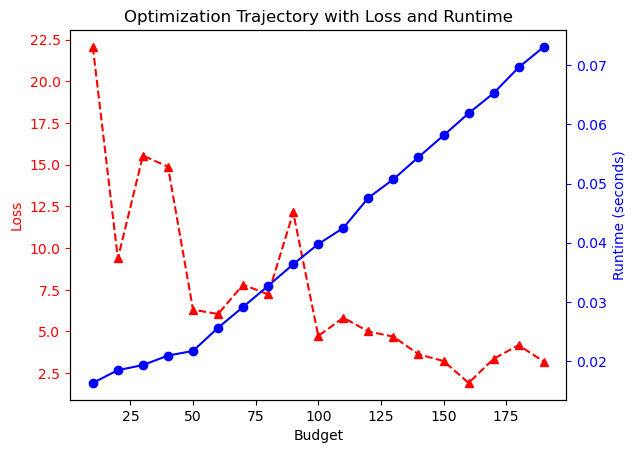

In [95]:
import time
import nevergrad as ng

# Objective function (example: Rosenbrock function)
def objective_function(x):
    return sum(100.0 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

# 不同 budget 下的运行
budgets = [10*i for i in range(1, 20)]
trajectory = []

for budget in budgets:
    start_time = time.time()  # 记录开始时间
    optimizer = ng.optimizers.CMA(parametrization=5, budget=budget)
    recommendation = optimizer.minimize(objective_function)
    end_time = time.time()  # 记录结束时间
    
    runtime = end_time - start_time  # 计算运行时间
    
    best_params = recommendation.value
    best_value = objective_function(best_params)
    
    trajectory.append((budget, best_value, runtime))

# 绘制轨迹
fig, ax1 = plt.subplots()

# 绘制左边纵轴
ax1.plot([x for x, _, _ in trajectory], [y for _, y, _ in trajectory], marker='^', linestyle='--', color='red')
ax1.set_xlabel('Budget')
ax1.set_ylabel('Loss', color='red')
ax1.tick_params('y', colors='red')

# 创建右边纵轴
ax2 = ax1.twinx()
ax2.plot([x for x, _, runtime in trajectory], [runtime for _, _, runtime in trajectory], marker='o', linestyle='-', color='blue')
ax2.set_ylabel('Runtime (seconds)', color='blue')
ax2.tick_params('y', colors='blue')

plt.title('Optimization Trajectory with Loss and Runtime')
plt.show()
